In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils, optimizers

Делим наш датасет на обучающую и тестовую выборку

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

Нормализация данных

In [3]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

создание модели нейронной сети

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

Компиляция модели

In [5]:
model.compile(optimizer=optimizers.Nadam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [6]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)

Epoch 1/50
782/782 [==============================] - 6s 5ms/step - loss: 3.9760 - accuracy: 0.0943 - val_loss: 3.8518 - val_accuracy: 0.1163
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 3.3383 - accuracy: 0.2009 - val_loss: 3.2812 - val_accuracy: 0.2116
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 3.0431 - accuracy: 0.2536 - val_loss: 3.1461 - val_accuracy: 0.2399
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 2.8501 - accuracy: 0.2922 - val_loss: 2.9393 - val_accuracy: 0.2720
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 2.7016 - accuracy: 0.3175 - val_loss: 2.7522 - val_accuracy: 0.3103
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 2.5854 - accuracy: 0.3442 - val_loss: 2.7221 - val_accuracy: 0.3216
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 2.4868 - accuracy: 0.3629 - val_loss: 2.9766 - val_accuracy: 0.2719
Epoch 

Проверка точности предсказания

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.8900 - accuracy: 0.3732


Графики

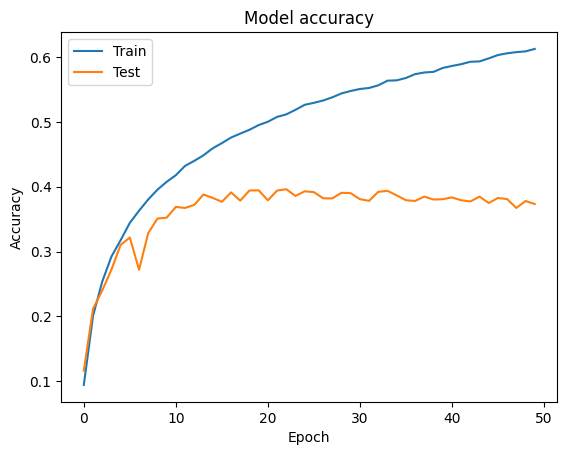

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

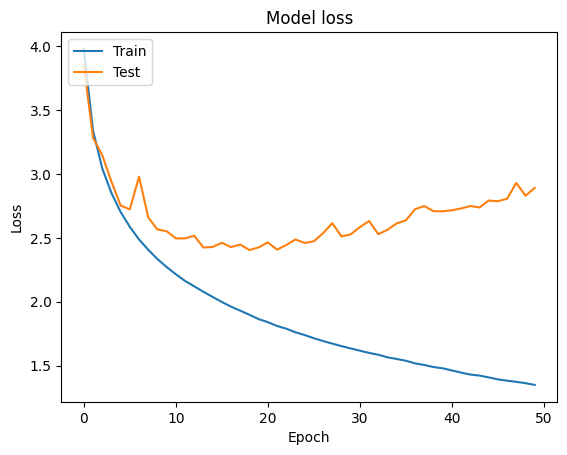

None


In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())